In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import pandas as pd
import networkx as nx
from functionality import set_retention, plot_total_runoff, plot_vq

## Einlesen der Daten

In [2]:
# lese Einzugsgebiete
df_subcats = gpd.read_file("oedter_einzugsgebiet.gpkg")
df_subcats["center"] = df_subcats["geometry"].centroid.apply(lambda p: p.coords[0])
# lese Netzwerk
g = nx.read_gml("oedter_graph.gml")
# lese Bemessungsregen
df_storms = pd.read_json("bemessungsregen_5540.json")

# Das Oedterstraße-Einzugsgebiet

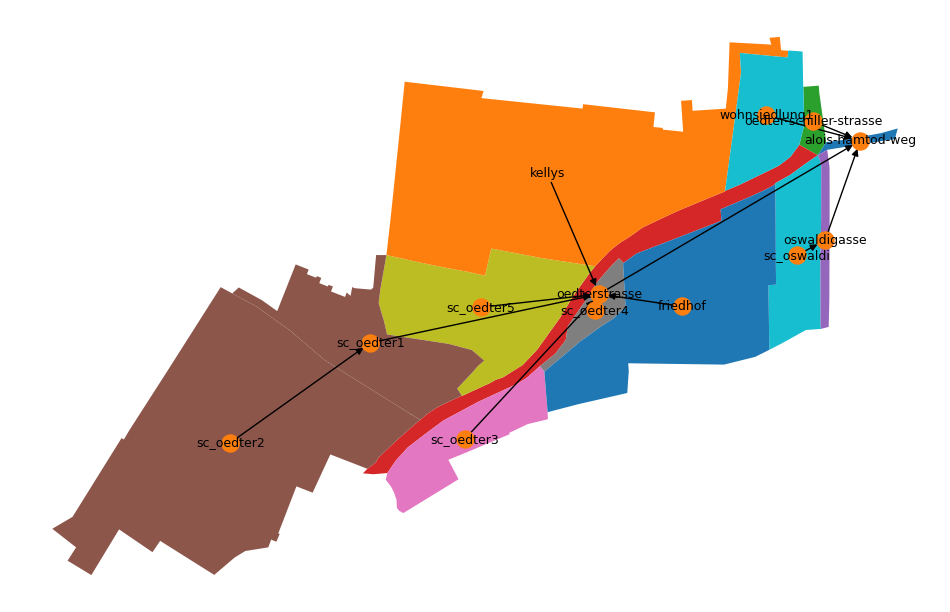

In [3]:
fig, ax = plt.subplots(figsize=[12,8])

pos = df_subcats.set_index("name")["center"].to_dict()
df_subcats.plot(column="name", ax=ax)
nx.draw(g, pos=pos, with_labels=True, ax=ax, arrows=True, font_size=9, node_color="tab:orange", node_size=150)

# Szenario: Keine Retentions-Volumina

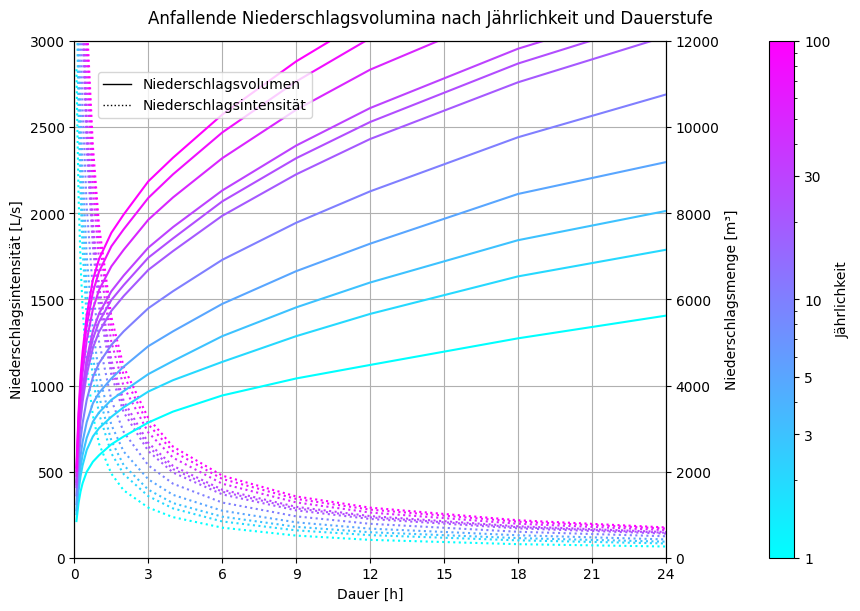

In [4]:
plot_total_runoff(df_storms, df_subcats)

# Szenario: S

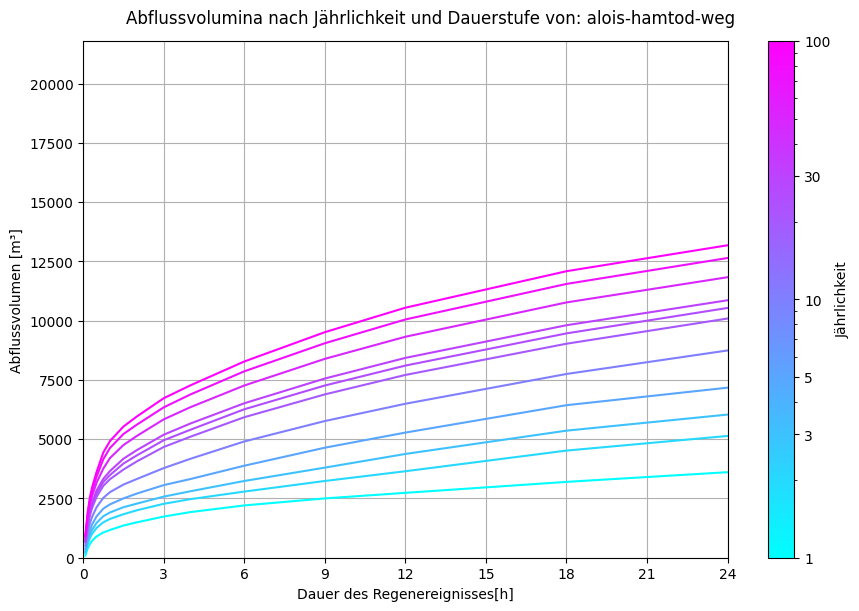

In [5]:
# Welches Teileinzugsgebiet soll dargestellt werden?
subcat_of_interest = "alois-hamtod-weg"

# Gebe Retentionsvolumina an:
dict_retention = {
    "kellys": 1400,
    "oedterstrasse": 514,
    "wohnsiedlung1": 101,
    "oswaldigasse": 0,
    "friedhof": 0,
    "alois-hamtod-weg": 0,
    "oedter-schiller-strasse": 0
}
# bereite Berechnung vor
retention = np.zeros(len(g.nodes))
for node, volume in dict_retention.items():
    retention = set_retention(node, volume, g, retention)

# Führe Berechnung aus und stelle Ergebnisse dar
plot_vq(g, subcat_of_interest, df_storms, retention)

# Szenario: L

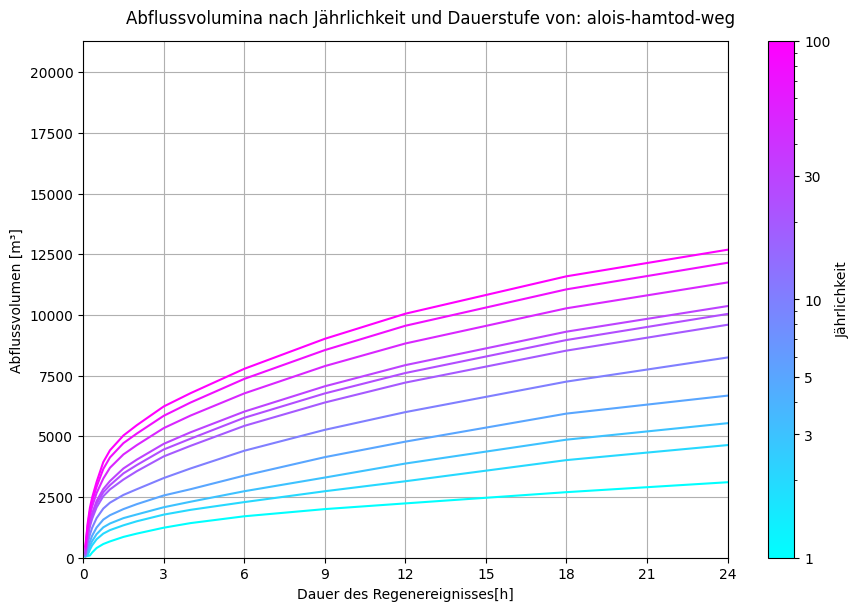

In [6]:
# Welches Teileinzugsgebiet soll dargestellt werden?
subcat_of_interest = "alois-hamtod-weg"

# Gebe Retentionsvolumina an:
dict_retention = {
    "kellys": 1400,
    "oedterstrasse": 1014,
    "wohnsiedlung1": 101,
    "oswaldigasse": 0,
    "friedhof": 0,
    "alois-hamtod-weg": 0,
    "oedter-schiller-strasse": 0
}
# bereite Berechnung vor
retention = np.zeros(len(g.nodes))
for node, volume in dict_retention.items():
    retention = set_retention(node, volume, g, retention)

# Führe Berechnung aus und stelle Ergebnisse dar
plot_vq(g, subcat_of_interest, df_storms, retention)